# Assignments
In this week's assignments, you will train a LightGBM regression model to predict public bike sharing demand given the attributes like datetime and weather conditions. The dataset ("bike_sharing_demand.csv", located under the same directory as this notebook) used in this week's assignments is a preprocessed version of [this kaggle dataset](https://www.kaggle.com/competitions/bike-sharing-demand/overview). You'll learn more about data preprocessing next week. Additionally, you'll use MLflow to track the model training and Deepchecks to evaluate the trained model. 

**Guidelines of submitting assignments**:
- For each assignment, a code skeleton is provided. Please put your solutions in between the `### START CODE HERE` and `### END CODE HERE` code comments. 
- Some assignments also require you to answer questions or capture screenshots in order to earn points. Please put all your answers and the required screenshots into a single PDF file. For each answer or screenshot, please clearly indicate which assignment it corresponds to in your PDF file. 
- When preparing your submission, be sure to include your assignment notebook with code cell outputs. It's important that these outputs are current and reflect the latest state of your code, as your grades may depend on them. Additionally, please include the PDF file that contains your answers and screenshots in your submission. 

In case type hints are new to you, you'll see something below in some code skeletons:
```python
def greeting(name: str) -> str:
    return 'Hello ' + name  
```
The annotation `name: str` means the parameter `name` is expected to be of type `str` and `-> str` means the type of the returned value is also `str`. These type hints are provided to help you understand the function's input requirements and its expected output in the assignments.

## Assignment 0: Set up the course environment (4 points)
You can earn 4 points for successfully setting up the course environment. To do so, simply write "yes" in your PDF file. Additionally, feel free to provide suggestions for improving the instructions within your PDF file.

In [1]:
import pandas as pd
from lightgbm import LGBMRegressor
import mlflow
from deepchecks.tabular import Suite
from deepchecks.tabular.checks import TrainTestPerformance, ModelInferenceTime, MultiModelPerformanceReport
from deepchecks.tabular import Dataset
from pathlib import Path
import os
import pickle

from typing import Tuple

deepchecks - WARNING - You are using deepchecks version 0.17.4, however a newer version is available. Deepchecks is frequently updated with major improvements. You should consider upgrading via the "python -m pip install --upgrade deepchecks" command.


Yes.
Suggestion: I will suggest we can change the keyboard layout on this virtual machine into English format keyboard insteaf of Finnish keyboard if possible. I think it will be more convenient for most students who are international.

## Assignment 1: Download and split the dataset (2 points)

### 1a) Load the data
First, implement the `pull_data` function that loads a CSV as a Pandas DataFrame from a given location. 

In [2]:
def pull_data(dataset_path: Path) -> pd.DataFrame:
    """
    Download the data set from a given path
    Args: 
        dataset_path (Path): Path of the CSV 
    Returns:
        A Pandas DataFrame of the dataset
    """
    ### START CODE HERE
    df = pd.read_csv(dataset_path)
    return df
    ### END CODE HERE


In [3]:
# You can use this code cell to check if your pull_data function works correctly
dataset_path = Path.cwd() / "bike_sharing_demand.csv"
df = pull_data(dataset_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   hour        10886 non-null  int64  
 10  day         10886 non-null  int64  
 11  month       10886 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1020.7 KB


<details>
    <summary>Expected output</summary>
    <img src="./images/dataset-info.png"/>
</details>

Below is the explanation of each column in the dataset:

**Variables**:

| Column name |  Explanation | type |
|-------------|---------------|----|
| season      | 1 = spring, 2 = summer, 3 = fall, 4 = winter | integer
| holiday     | whether the day is considered a holiday | integer
| workingday  | 1 if day is neither weekend nor holiday, otherwise 0. | integer
| weather     | 1: Clear, Few clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds; 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog | integer
| temp        | temperature in Celsius | float
| atemp       | "feels like" temperature in Celsius | float
| humidity    | relative humidity | integer
| windspeed   | wind speed | float
| hour        | the hours of the datetime| integer
| day         | the day of the datetime| integer
| month       | the month of the datetime| integer

**Targets**: 

| Column name | Explanation                                     | Type
|-------------|-------------------------------------------------| ----|
| count       | number of total rentals                         | integer

### 1b) Split the data into train and test DataFrames
Then implement the `splitData` function that splits the dataset into a training and a test dataset, using the last 168 rows of the dataset as the test data.

Hint: You may find [pandas.DataFrame.iloc](https://pandas.pydata.org/pandas-docs/version/1.5/reference/api/pandas.DataFrame.iloc.html) useful. 

In [4]:
def splitData(input_df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Split a DataFrame into training and testing sets
    Args:
        input_df (DataFrame): The DataFrame to be splitted
    Return:
        A tuple of training and testing DataFrame
    """
    ### START CODE HERE
    train_df = input_df.iloc[:-168,:]
    test_df = input_df.iloc[-168:,:]
    return (train_df, test_df)
    ### END CODE HERE

In [5]:
df = pull_data(dataset_path)
train, test = splitData(df)
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
count,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000
mean,2.483206,0.029017,0.680351,1.418268,20.327554,23.751554,61.777944,12.847561,191.275518,11.542265,9.898395,6.435622
std,1.108993,0.167861,0.466362,0.634893,7.806103,8.496143,19.250565,8.174376,181.304517,6.915736,5.461328,3.401736
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,42.000000,6.000000,5.000000,3.000000
50%,2.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,144.500000,12.000000,10.000000,6.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,283.000000,18.000000,15.000000,9.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,977.000000,23.000000,19.000000,12.000000


<details>
    <summary>Expected output</summary>
    <img src="./images/train-df.png"/>
</details>

In [6]:
print(f"The dimension of the training dataset should be {train.shape}")
print(f"The dimension of the testing dataset should be {test.shape}")

The dimension of the training dataset should be (10718, 12)
The dimension of the testing dataset should be (168, 12)


Expected output:

The dimension of the training dataset should be (10718, 12)

The dimension of the testing dataset should be (168, 12)

In [7]:
# Split the training and testing DataFrames into features and targets
target = "count"
input_df = pull_data(Path.cwd() / "bike_sharing_demand.csv")
train, test = splitData(input_df)
train_x = train.drop([target], axis=1)
test_x = test.drop([target], axis=1)
train_y = train[[target]]
test_y = test[[target]]

## Assignment 2: Offline model evaluation using Deepchecks (2 points)

### 2a) Construct the Dataset objects used by Deepchecks
First, let's construct the Deepchecks Dataset objects from the train and testing DataFrames.

In [8]:
# Categorical features, remember to specify the categorical features when you construct the datasets handled by Deepchecks
# See https://docs.deepchecks.com/stable/tabular/usage_guides/dataset_object.html
cat_features = ["season", "holiday", "workingday", "weather", "hour", "day", "month"]

### START CODE HERE
# Replace None with correct arguments
train_dataset = Dataset(df=train_x, label=train_y, cat_features=cat_features)
test_dataset = Dataset(df=test_x, label=test_y, cat_features=cat_features)
### END CODE HERE

### 2b) Deepchecks Suite with conditions
Implement the `evaluate` function that uses Deepchecks Suite to perform the following two tests:
1) Evaluate the model's MAE and RMSE on both training and testing dataset. This test should fail if the MAE or RMSE drops more than 20% on the testing dataset compared to the training dataset;
2) Evaluate the model's inference time. This test should fail if the inference time exceeds 0.1 second. 

Additionally, this function should save the evaluation results into an HTML file under the same directory as this notebook. 

**Hints**:
- [How to add conditions to a test?](https://docs.deepchecks.com/stable/general/usage/customizations/auto_examples/plot_configure_check_conditions.html)
- [Train test performance](https://docs.deepchecks.com/stable/api/generated/deepchecks.tabular.checks.model_evaluation.TrainTestPerformance.html)
- [Model inference time](https://docs.deepchecks.com/stable/tabular/auto_checks/model_evaluation/plot_model_inference_time.html)
- [Condition for comparing model performance between training and testing dataset](https://docs.deepchecks.com/stable/api/generated/deepchecks.tabular.checks.model_evaluation.TrainTestPerformance.add_condition_train_test_relative_degradation_less_than.html#deepchecks.tabular.checks.model_evaluation.TrainTestPerformance.add_condition_train_test_relative_degradation_less_than)
- [Condition for validating inference time](https://docs.deepchecks.com/stable/api/generated/deepchecks.tabular.checks.model_evaluation.ModelInferenceTime.add_condition_inference_time_less_than.html)
- [How to export the evaluation result into a file?](https://docs.deepchecks.com/stable/general/usage/export_save_results.html#save-result-as-an-html-report-save-as-html)

In [9]:
def evaluate(train_dataset: Dataset, test_dataset: Dataset, model: LGBMRegressor, filename: str) -> str:
    """
    Use Deepchecks to evaluate 1) model's MAE and RMSE on both training and testing dataset, 2) model's inference time. Then save the evaluation results to an HTML file
    Args:
        train_dataset (Dataset): training Dataset
        test_dataset (Dataset): testing Dataset
        model (LGBMRegressor): The LightGBM regression model to be evaluated
        filename: The file name of the evaluation results
    Return:
        Name of the created HTML file
    """
    
    ### START CODE HERE
    #Create a suite
    suite = Suite("Example test suite", 
    TrainTestPerformance(scorers=["neg_mae", "neg_rmse"]).add_condition_train_test_relative_degradation_less_than(0.2),
    ModelInferenceTime().add_condition_inference_time_less_than(0.1)
    )

    #Run the suite
    result = suite.run(model=model, train_dataset=train_dataset, test_dataset=test_dataset)
    result.save_as_html(filename)

    return filename

    ### END CODE HERE


In [10]:
# We provide a testing model trained on the same bike demand dataset to help you check if your evaluate function works correctly
test_model = pickle.load(open("test-model.pkl", "rb"))
result_file_name = evaluate(train_dataset, test_dataset, test_model, "test-result.html")
print(result_file_name)

test-result.html


After running the above code cell, you should see a file named "test-result.html" appear under the same directory with this notebook.

Let's render this HTML file in a browser. 

In [40]:
import webbrowser
webbrowser.open("file://" + str(Path.cwd() / result_file_name))

True

<details>
    <summary> Expected output (in the browser) </summary>
    <br />
    The test of MAE/RMSE should fail:
    <br />
    <img src="./images/deepchecks-train-test-performance.png">
    <br />
    The test of inference time should pass:
    <br />
    <img src="./images/deepchecks-inference-time.png">
</details>

### Screenshots to be submitted for Assignment 2
Similar to the expected output above, please submit screenshots of the web page showing which test passed and which test failed. 

![Screenshot from 2023-11-10 18-13-38.png](<attachment:Screenshot from 2023-11-10 18-13-38.png>) ![Screenshot from 2023-11-10 18-14-04.png](<attachment:Screenshot from 2023-11-10 18-14-04.png>)
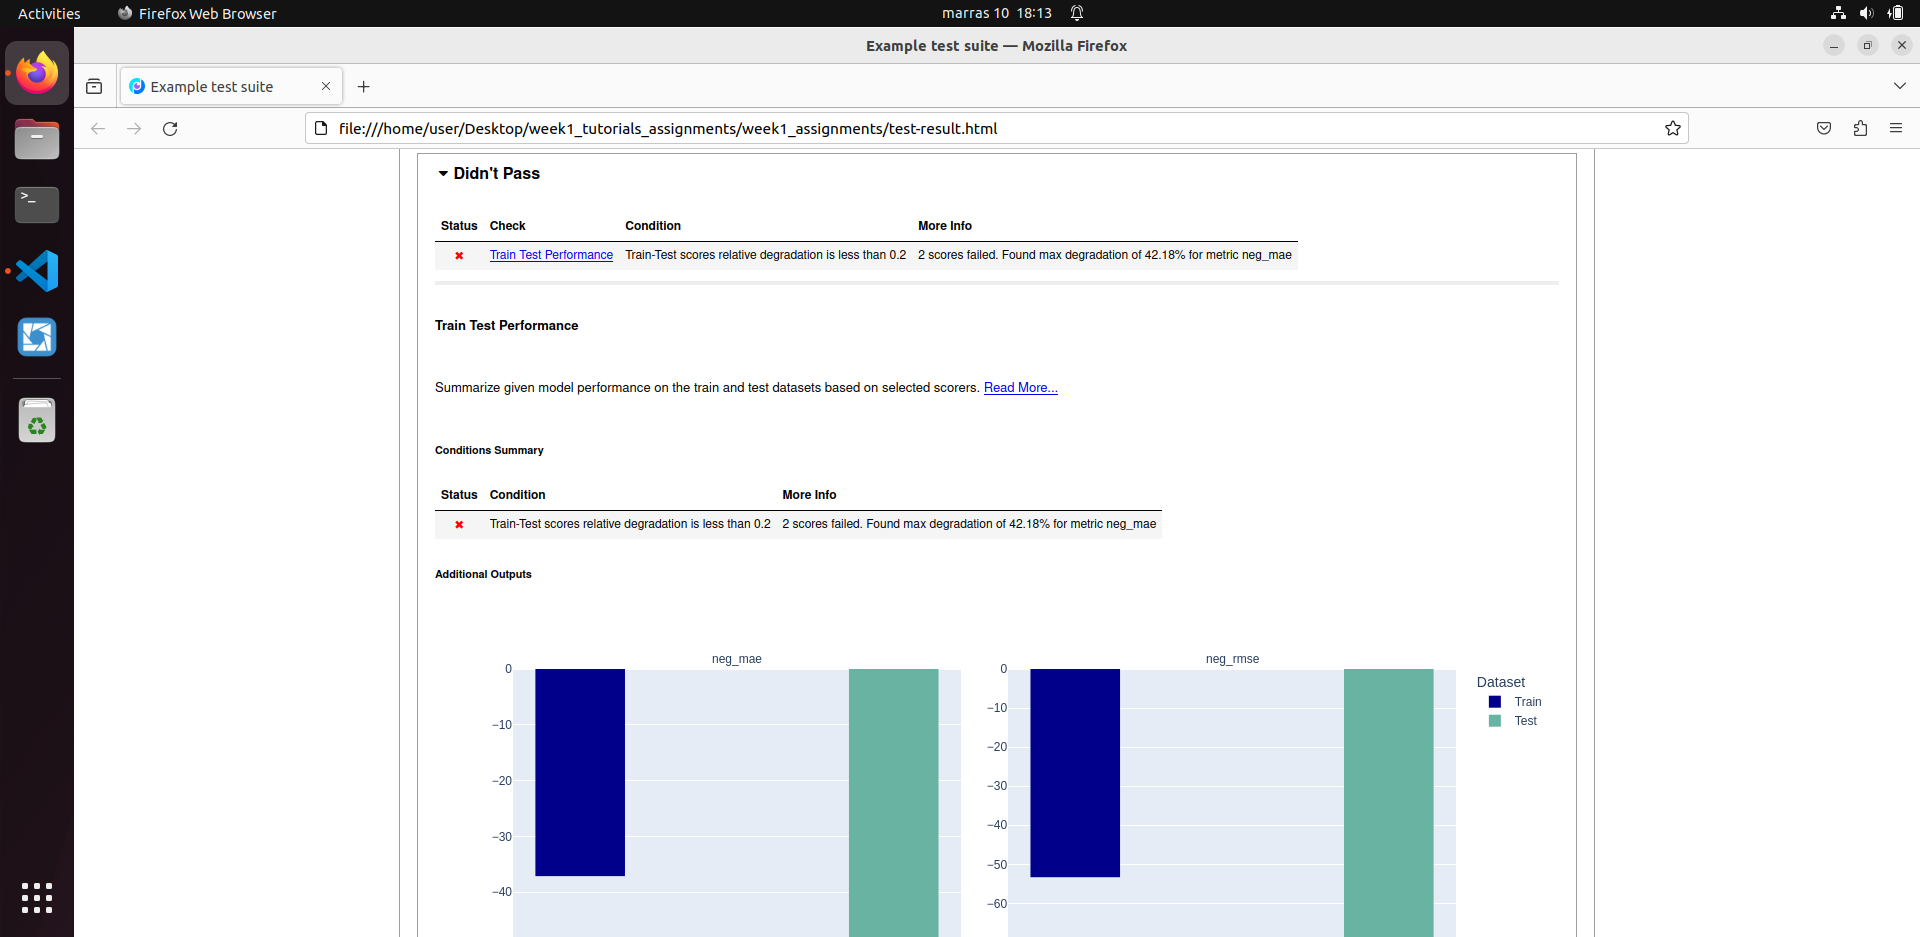
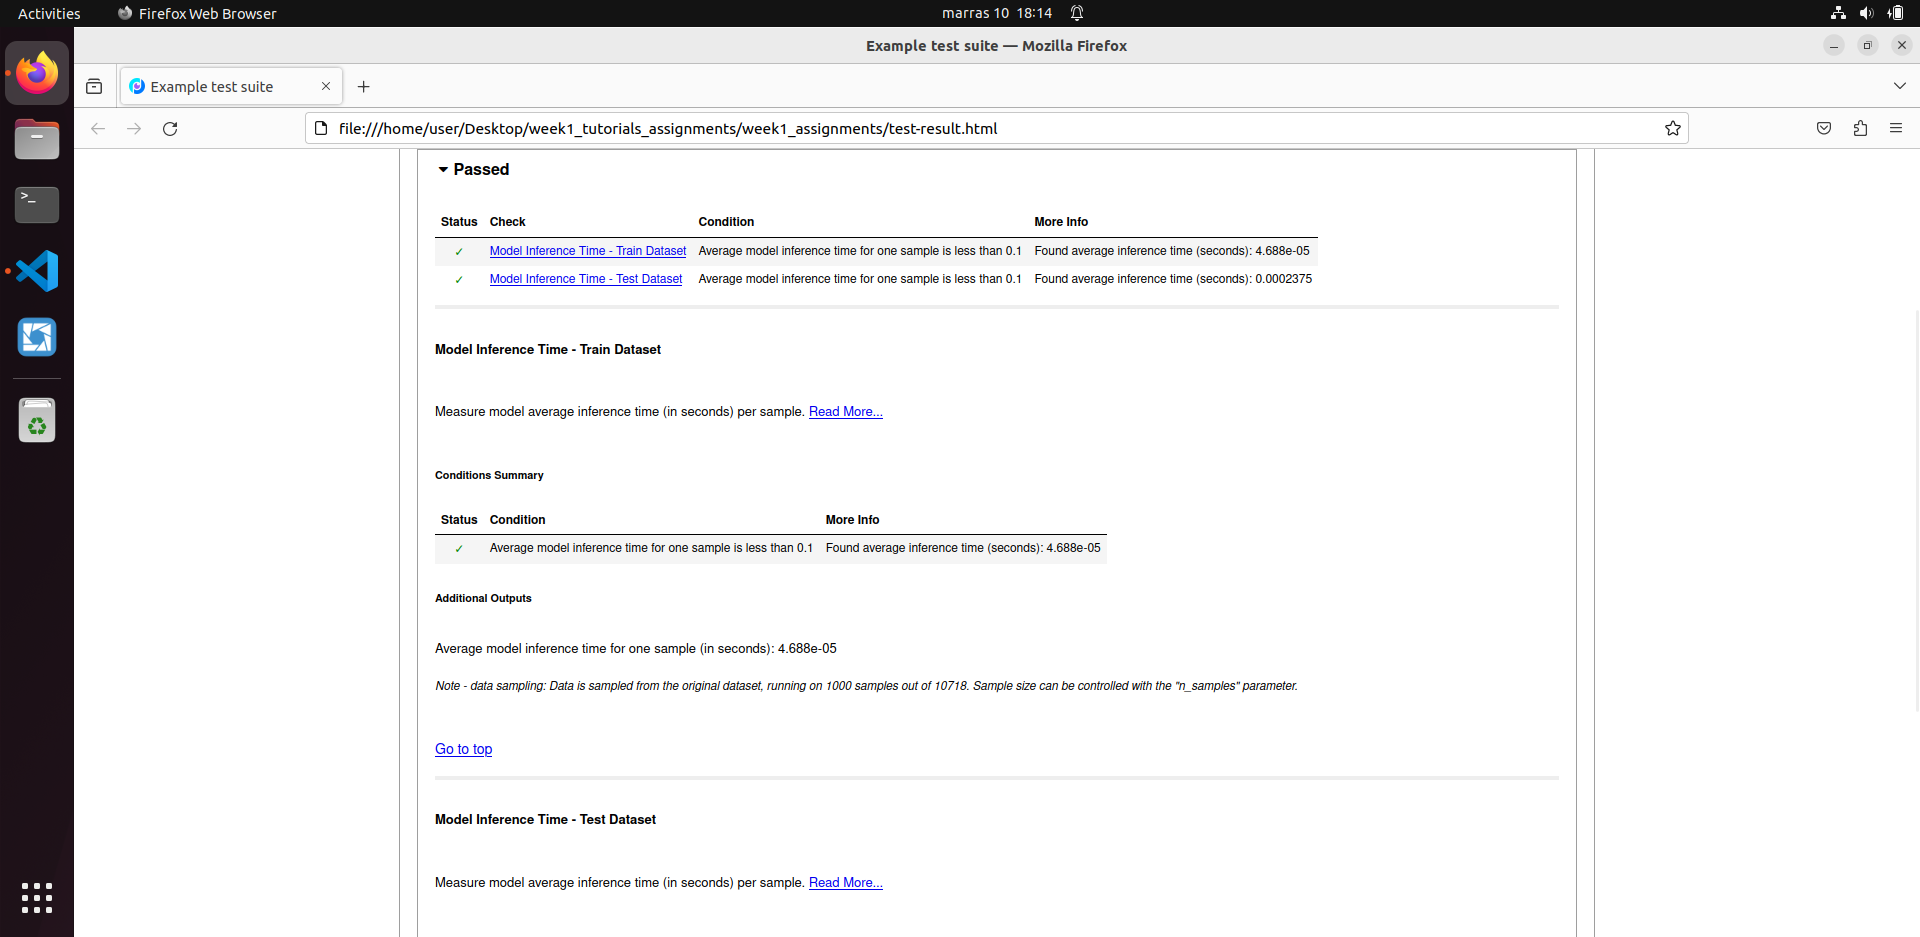

## Assignment 3: Tracking model training in MLflow (2 points)
Similar to what you see in the MLflow tutorial, you need to complete the following tasks in this assignment: 
1) Use LightGBM to train a regression model to predict the bike sharing demand. The model should be trained using the training DataFrame you prepared previously and with the following hyperparameters: num_leaves = 63, learning_rate = 0.05, random_state = 42 (for reproducibility).
2) Use MLflow to track the model training. Specifically, you need to log the used hyperparameters and use the `evaluation` function you created above to evaluate the trained model. You also need to upload the Deepchecks evaluation result file and register the trained model to MLflow.  

**Hint**: You can check [LightGBM documentation on how to train a regression model](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html#) if you're not familiar with it.

**Note**: LightGBM provides two types of APIs, the native APIs and the Scikit-learn (sklearn) APIs. The sklearn APIs can be seen as an interface that allows you to use a LightGBM model as if it was trained using the sklearn library. The model trained in this assignment will be used in other assignments in the upcoming weeks. Please use the **sklearn API** in this assignment to avoid unexpected issues.

In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np
# mlflow configuration
MLFLOW_S3_ENDPOINT_URL = "http://mlflow-minio.local"
MLFLOW_TRACKING_URI = "http://mlflow-server.local"
AWS_ACCESS_KEY_ID = "minioadmin"
AWS_SECRET_ACCESS_KEY = "minioadmin"
mlflow_experiment_name = "week1-lgbm-bike-demand"

os.environ["MLFLOW_S3_ENDPOINT_URL"] = MLFLOW_S3_ENDPOINT_URL
os.environ["AWS_ACCESS_KEY_ID"] = AWS_ACCESS_KEY_ID
os.environ["AWS_SECRET_ACCESS_KEY"] = AWS_SECRET_ACCESS_KEY
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment(mlflow_experiment_name)

# model hyperparameters
num_leaves = 63
learning_rate = 0.05
random_state = 42

In [12]:
model = LGBMRegressor(num_leaves=num_leaves, learning_rate=learning_rate, random_state=random_state)

with mlflow.start_run() as run:
    ### START CODE HERE
    model.fit(train_x, train_y)
    predicted_qualities = model.predict(test_x)

    mse = np.sqrt(mean_squared_error(test_y, predicted_qualities))
    
    mlflow.log_param("num_leaves", num_leaves)
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("random_state", random_state)
    mlflow.log_metric("mse", mse)

    artifact_name = "model"
    mlflow.sklearn.log_model(model, artifact_name, registered_model_name="LightGBM")
    mlflow.log_artifact(result_file_name)
    ### END CODE HERE



/home/user/anaconda3/envs/mlops_eng/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning:

Setuptools is replacing distutils.

Registered model 'LightGBM' already exists. Creating a new version of this model...
2023/11/12 12:20:12 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: LightGBM, version 6
Created version '6' of model 'LightGBM'.


### Screenshots to be submitted for Assignment 3
To get the points from Assignment 3, please submit the following screenshots:
1. The logs of your MLflow run. Please include the parameters of the model in your screenshot. 
<details>
    <summary>Example</summary>
    <img src="./images/mlflow-run.png" width=1000>
</details>

2. The details of the MLflow run including uploaded Deepchecks evaluation result file;
<details>
    <summary>Example</summary>
    <img src="./images/mlflow-run-detail1.png" width=1000>
    <img src="./images/mlflow-run-detail2.png" width=1000>
    <img src="./images/mlflow-run-detail3.png" width=1000>
</details>

3. The registered model.
<details>
    <summary>Example</summary>
    <img src="./images/mlflow-model.png" width=1000>
</details>

![Screenshot from 2023-11-12 12-04-50.png](<attachment:Screenshot from 2023-11-12 12-04-50.png>) ![Screenshot from 2023-11-12 12-05-06.png](<attachment:Screenshot from 2023-11-12 12-05-06.png>) ![Screenshot from 2023-11-12 12-05-11.png](<attachment:Screenshot from 2023-11-12 12-05-11.png>) ![Screenshot from 2023-11-12 12-05-18.png](<attachment:Screenshot from 2023-11-12 12-05-18.png>)![Screenshot from 2023-11-12 12-06-10.png](<attachment:Screenshot from 2023-11-12 12-06-10.png>)
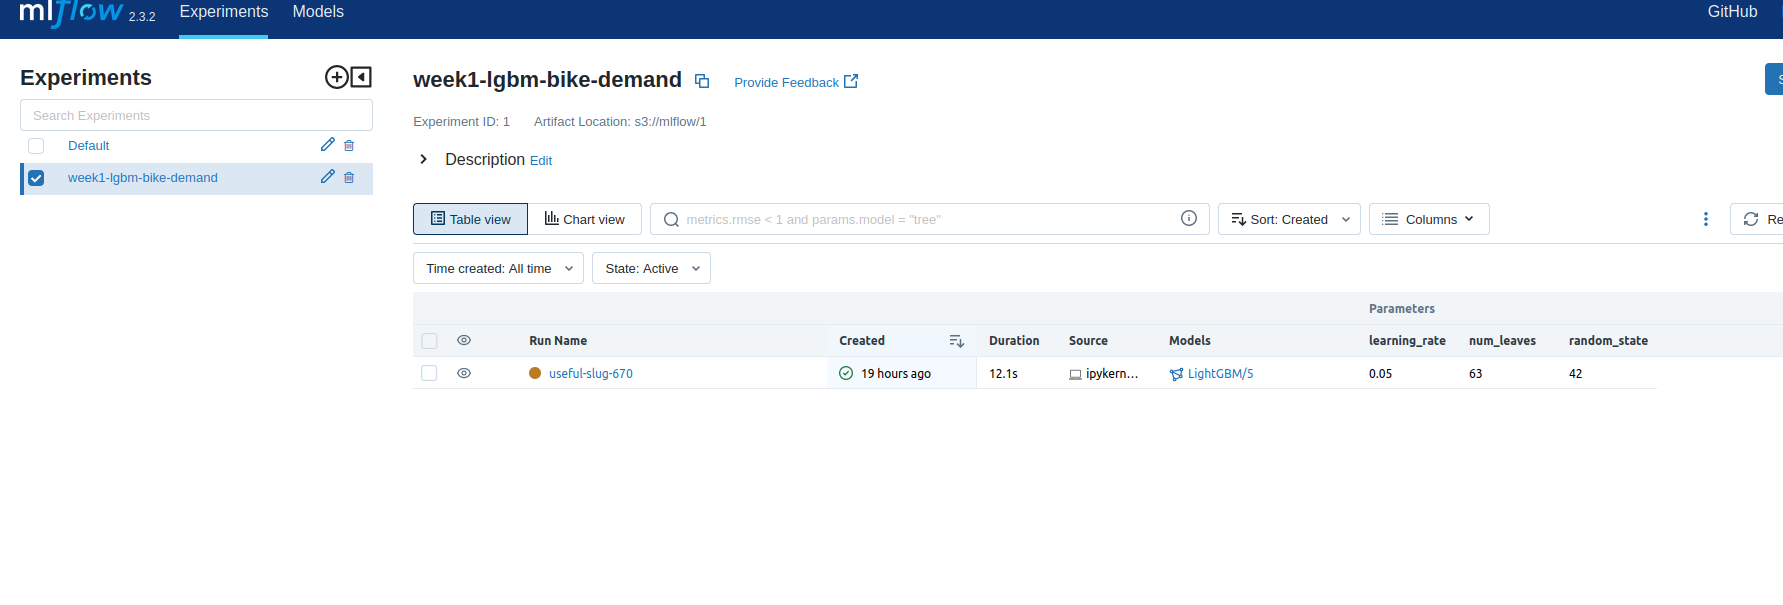
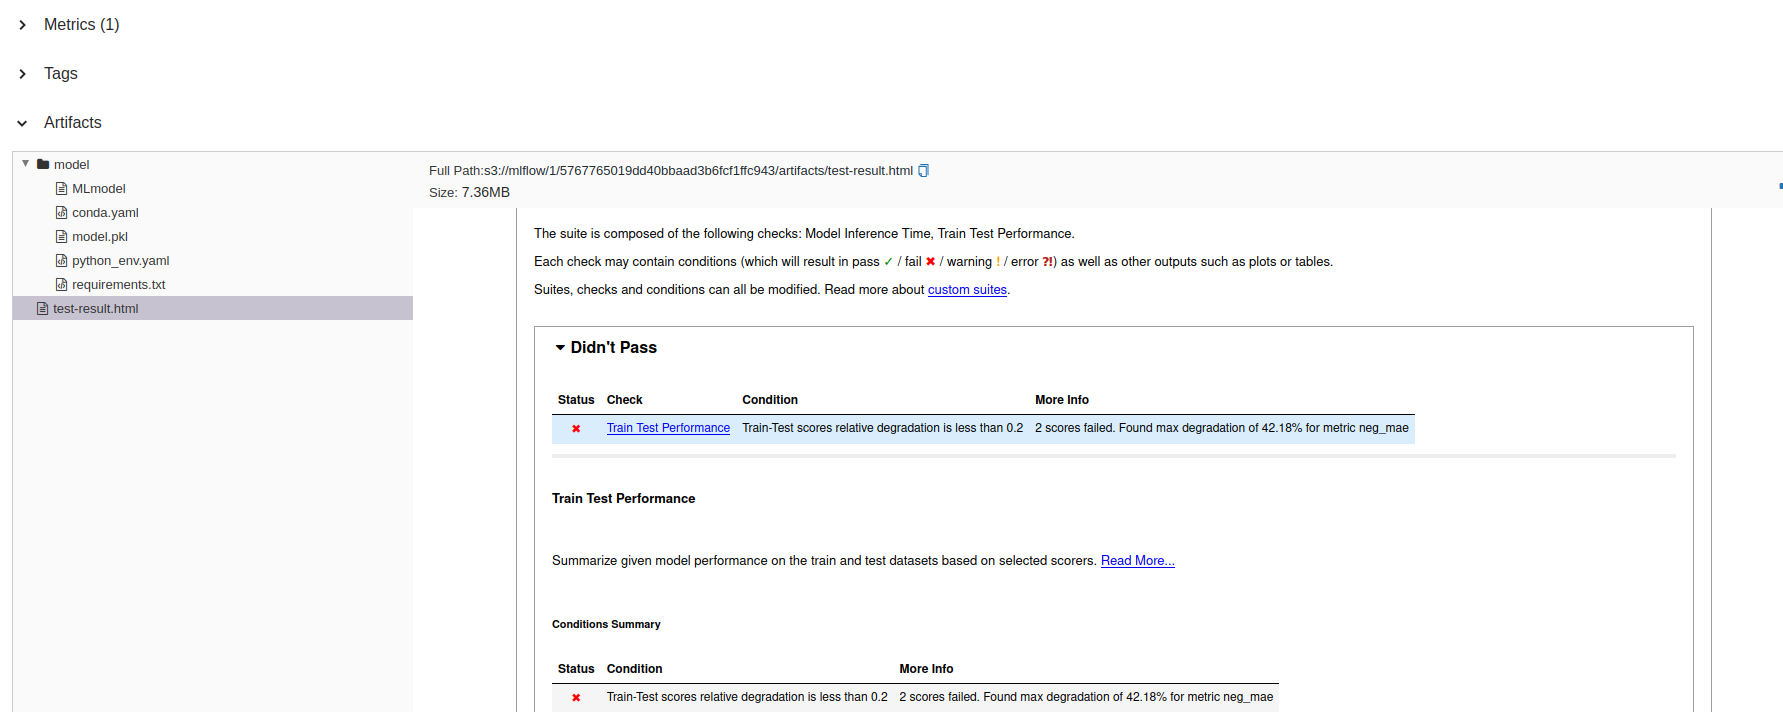
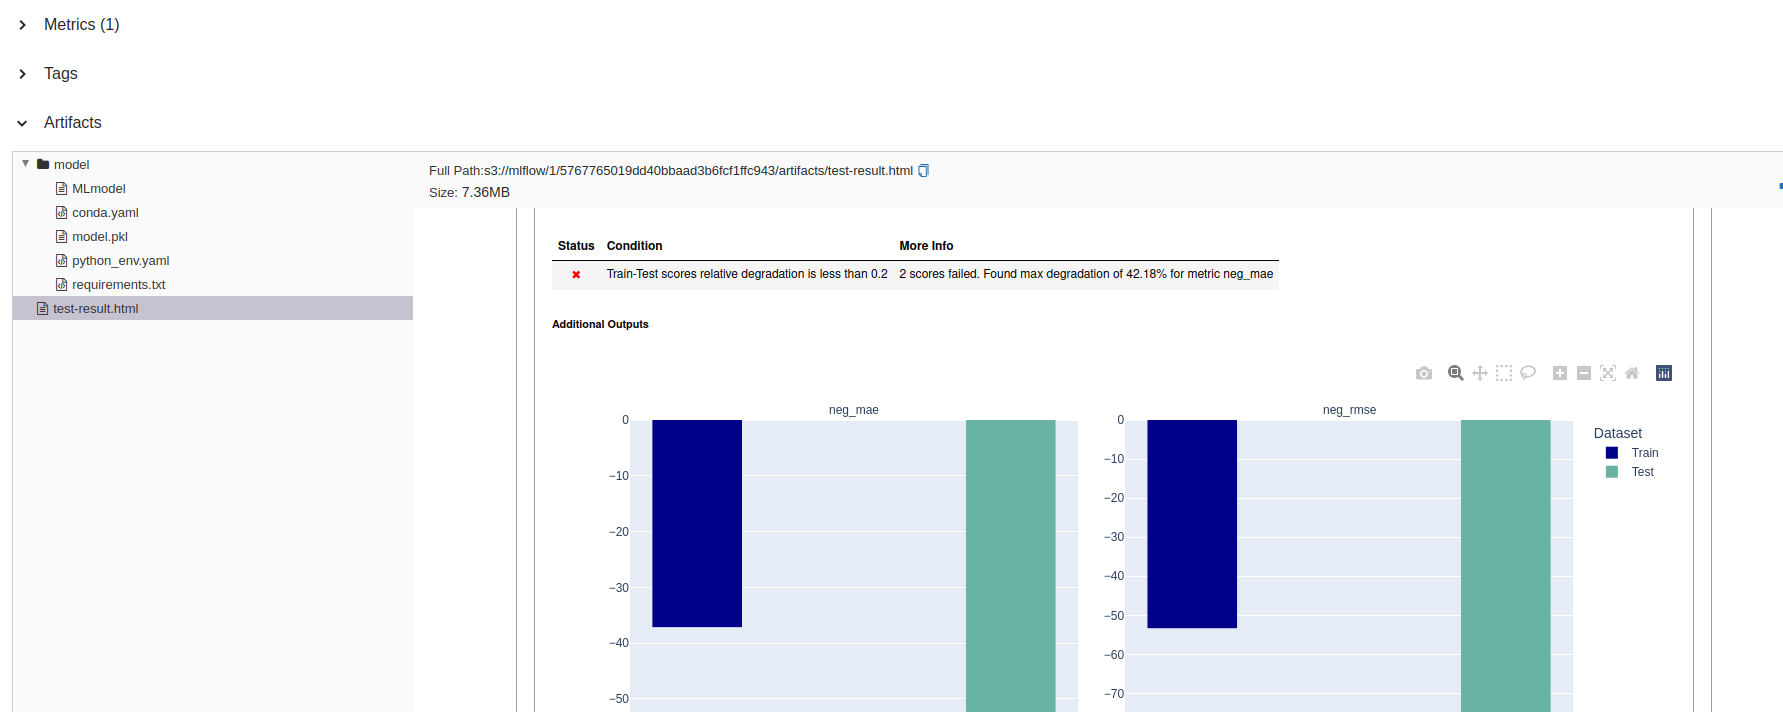
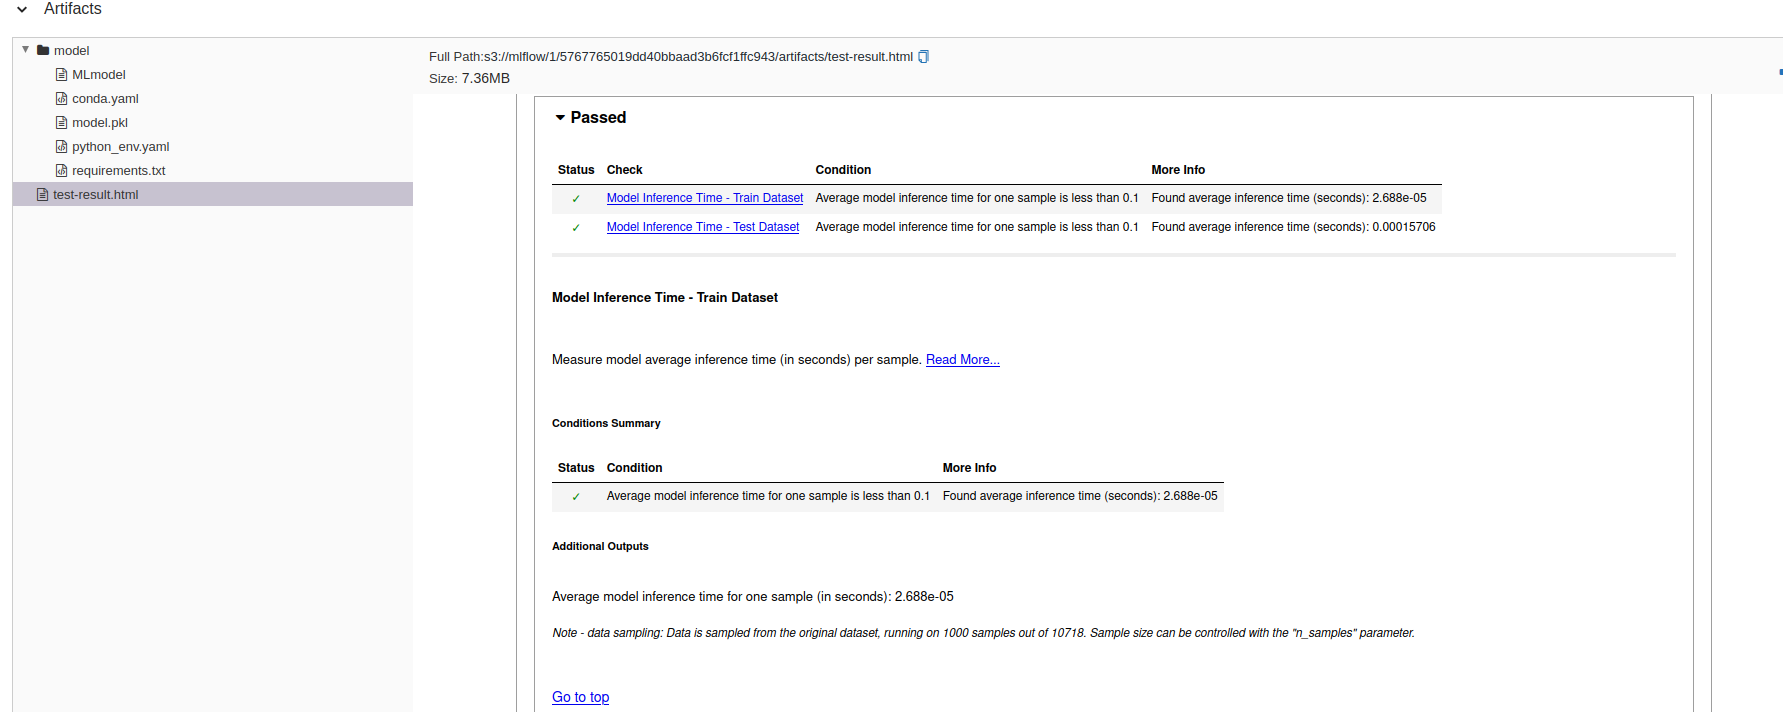
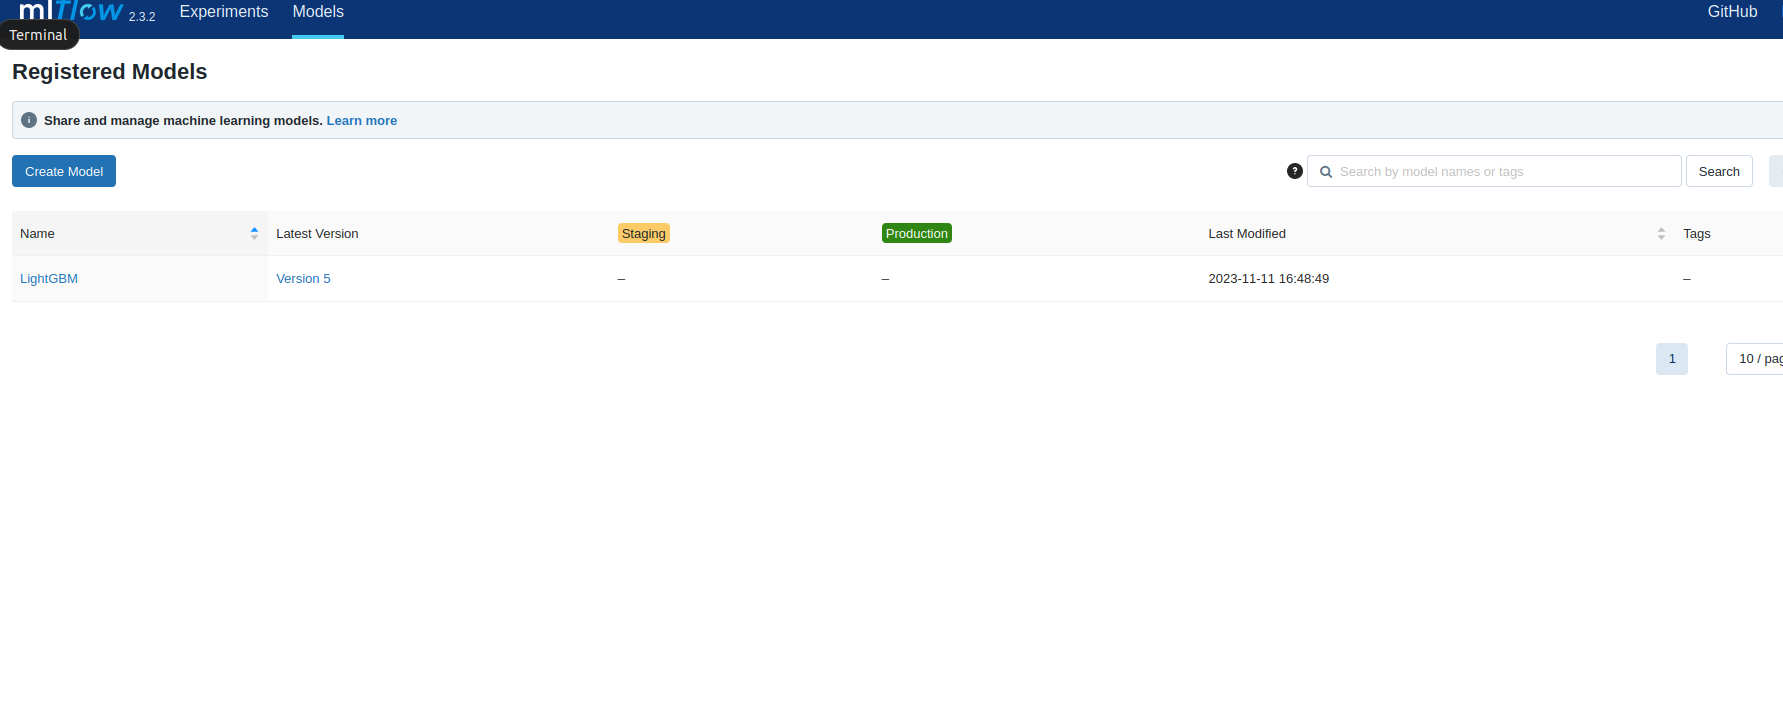

## Assignment 4: Evaluate the trained model against another model (2 points)
Suppose your colleague had trained an ElasticNet model for the same use case of bike sharing demand prediction. In this assignment, your tasks are:
1. Using Deepchecks to compare MAE and RMSE of your LightGBM model to the ElasticNet model and saving the result as an HTML file;
1. Uploading the result file to MLflow, the file should be under the MLflow Run where you trained your LightGBM model in Assignment 3. E.g.,

<img src="./images/ass4-example.png" width=300 />

Note that the idea here is to attach a file to an existing MLflow Run, not to create a new MLflow Run and then upload the file under the new MLflow Run. 

You may find the following docs helpful: 
- [Multi model performance report](https://docs.deepchecks.com/stable/tabular/auto_checks/model_evaluation/plot_multi_model_performance_report.html).
- [mlflow.start_run](https://mlflow.org/docs/2.3.2/python_api/mlflow.html#mlflow.start_run) (Pay attention to the use of the `run_id` parameter).

In [13]:
# Load the ElasticNet model first
old_model = pickle.load(open("old-model.pkl", "rb"))
old_model

/home/user/anaconda3/envs/mlops_eng/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning:

Trying to unpickle estimator ElasticNet from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



ElasticNet(alpha=0.5)

In [17]:
# Use Deepchecks to compare your LightGBM model to the ElasticNet model and save the result to an HTML file
### START CODE HERE
report = MultiModelPerformanceReport().run(train_dataset, test_dataset, [model, old_model])
report.save_as_html("my_report.html")
### END CODE HERE

'my_report.html'

In [21]:
# Upload the result file to MLflow. The file should be under the MLflow Run where you trained your LightGBM model
### START CODE HERE
with mlflow.start_run(run_id="13b1dfa378824449833450f6f66b7b77", nested=True):
    mlflow.log_artifact("my_report.html")
### END CODE HERE

### Screenshots to be submitted for Assignment 4
The details of the MLflow run including uploaded Deepchecks model comparison result file.
<details>
    <summary>Example</summary>
    <img src="./images/deepchecks-compare-models.png" />
</details>

![Screenshot from 2023-11-12 15-01-29.png](<attachment:Screenshot from 2023-11-12 15-01-29.png>)
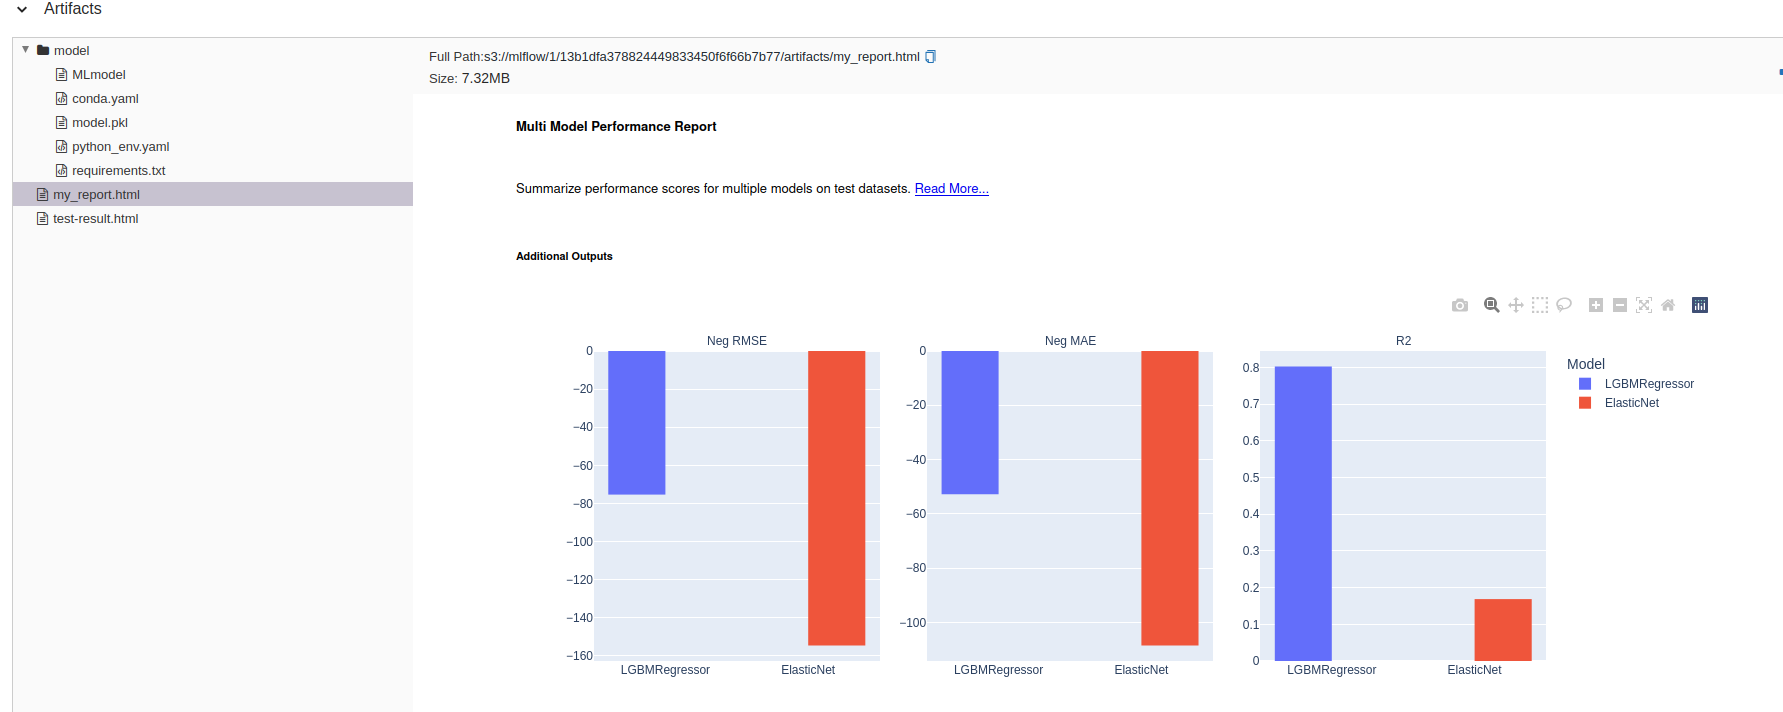